In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from car import Car
from road import Road
from simulation import Simulation, main
import statistics as st
%matplotlib inline

In [2]:
sim = Simulation()
car_list = sim.get_final_velocity()

In [3]:
car_means = Simulation.get_car_means(car_list)

In [4]:
speed_limit = Simulation.get_speed_limit(car_means)

In [5]:
def get_car_density(car_list):
    fig, ax = plt.subplots()
    for car in car_list:
        ax.scatter(car.position_list[:60], range(60), color='black')
    plt.title('Density of cars')
    plt.xlabel('Position on Road (m)')
    plt.ylabel('Time (s)')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 60)
    plt.show()

## Traffic Density
Below we have a graphical demonstration of traffic jams following the Nagel-Schreckenberg model. Each line of points along the y-axis represents the road (of 1000 meters) at one point in time. Each point is a location with a car in it with white space being empty parts of the road. Here we can see the speed decrease ripple through the cars easily.

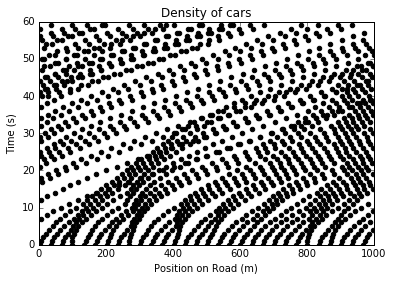

In [6]:
get_car_density(car_list)

## Velocity of Two Cars
In order to see the effects of one car's velocity has on those behind it, we pulled two cars from our simulation and plotted their velocity vs time. We can see every speed change of the green car directly affects the blue car behind it.

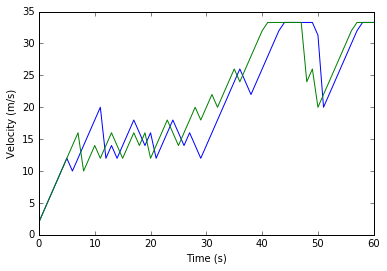

In [7]:
for car in car_list[:2]:
    plt.plot(car.velocity_list)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

## Velocities of Every Car
Now we take a look at the velocity of every car over the 60 second time range. We can tell that while some cars eventually approach a maximum velocity, all speed changes ripple throughout the entire plot.

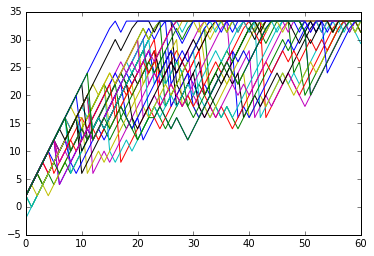

In [8]:
for car in car_list:
    plt.plot(car.velocity_list)
plt.show()

## Velocities of Every Car Between 5 and 25 Seconds
Now we take a look at the velocity of every car between 5 and 25 seconds. This more clearly demonstrates the velocity changes rippling through the traffic.

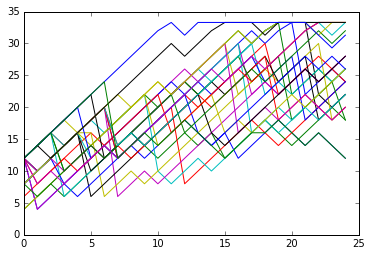

In [9]:
for car in car_list:
    plt.plot(car.velocity_list[5:30])
plt.show()

## 100 Simulations
Next we run the simulation 100 times in order to get the optimal speed limit for this stretch of road. This is performed by finding the mean of the velocities for each car for the last thirty seconds of each simulation. This is for all the cars to have the potential to hit their max speed before recording the data. Then taking the mean speeds, we can find the speed limit by adding the standard deviation to it.

In [10]:
total_mean, speed_limit, loop_set = Simulation.get_multiple_sims()

In [18]:
speed_limit = round(speed_limit)
speed_limit

32

## Speed Limits for Each Simulation
Below we see the speed limits found for each individual simulation. From this we can gather that any one individual simulation might give us an inaccurate answer but by taking a look at the whole, we can gain an accurate picture.

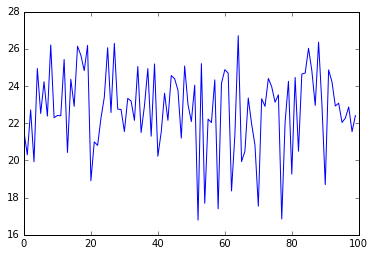

In [13]:
mean_list = []
speed_limits = []
for car_list in loop_set:
    for car in car_list:
        mean_list.append(st.mean(car.velocity_list))
    speed = Simulation.get_speed_limit(Simulation.get_car_means(car_list))
    speed_limits.append(speed)
plt.plot(speed_limits)